# Getting started

## Welcome to Ocelli!

*Ocelli (singular Ocellus, Latin: little eye) – simple eyes found in many insects in triplets. Their function is to navigate insects during the day or to detect movement.*

Ocelli is an open-source Python library with computational tools for visualizing multimodal single-cell developmental data. It includes tools for preprocessing, analysis, and plotting of single-cell multi-omics. Thanks to being integrated with the universal standard AnnData data structure and using scanpy-like syntax, Ocelli can be easily added to your familiar single-cell analysis pipelines.

This series of tutorials presents a spectrum of Ocelli’s possibilities and applications. Ocelli is designed for analyzing multimodal data when each cell has entries from each modality. Firstly, we will work on simulated data to build intuition. We will then proceed to single-cell multimodal data from human bone marrow and hair follicle - including modalities such as chromatin accessibility, gene expression, or protein. Lastly, we will share a new perspective on analyzing unimodal data based on pancreatic endocrinogenesis and cell reprogramming data. Let’s go!

## Learning Objectives

After this tutorial, you should be able to:
    
- Understand what multimodal data is;
- Understand the benefits of multimodal data visualizations over unimodal ones;
- Construct a Multimodal Diffusion Maps embedding of simulated data and visualize it using Ocelli.

**Note**: This is the first tutorial, which is an introduction based on simulated data. Analysis of single-cell data is discussed in subsequent tutorials.

## Unimodal perspective

Modality, in general, refers to how something happens - its context or origin. For example, when sequencing cells, you can analyze their transcriptome. This is a single cellular modality. However, a wide range of biological information is lost when analyzing only a transcriptome. A simplistic version of the *central dogma of molecular biology* states that *DNA makes RNA, and RNA makes protein*. As a result, when looking solely at RNA, you omit molecular information hidden in DNA and protein. DNA and protein are other modalities, each contributing information unavailable in RNA. Suppose you intend to understand molecular biological processes. In that case, you need to be able to interpret such multimodal signals together, not individually.

To build your intuition, we prepared simulated data, which is easy to interpret and visualize. Firstly, we will explore it unimodally.

Import Ocelli as

In [1]:
import ocelli as oci

We shorten the imported name to ``oci`` for better code readability using Ocelli. 
Ocelli has three modules: ``oci.pp`` (data preprocessing), ``oci.tl`` (analysis tools), and ``oci.pl`` (plotting).
The workflow typically consists of multiple function calls on an ``anndata.AnnData`` object.

Ocelli can produce static plots using [Matplotlib](https://matplotlib.org) and interactive plots using [Plotly](https://plotly.com/python/).
``oci.pl`` functions return Matplotlib Figure and Axes objects or a Plotly Figure object that you can further customize. 
The presented tutorials will show only static Matplotlib plots due to the incompatibility issues between interactive Plotly plots and the online documentation.

Set Matplotlib figure resolution of shown plots.

In [2]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 200

Some Ocelli functions include probabilistic steps. For result reproducibility, we set a random seed. If you omit this step, each run will result in marginally different outcomes, which is a natural outcome of stochastic processes.

In [3]:
SEED = 17

Now, load the data. 

In [4]:
import anndata

adata = anndata.read_h5ad('../../../data/binary-tree-dataset.h5ad')
adata

AnnData object with n_obs × n_vars = 6000 × 1
    obs: 'type', 'pseudotime'
    uns: 'modalities'
    obsm: 'modality0', 'modality1', 'modality2'

Ocelli uses an annotated data structure called [AnnData](https://anndata.readthedocs.io). If you're unfamiliar with it, we recommend glancing at its linked documentation.

Here, we load a h5ad file storing an AnnData object with three modalities in ``adata.obsm`` saved under keys ``modality0``, ``modality1``, and ``modality2``. Each modality is an array with rows corresponding to observations and columns to variables/features. Note that *i*-th rows in all modalities correspond to the same observation.

In this particular dataset, modalities are 3-dimensional for quick intuitive visualizations, that would be impossible for high-dimensional single-cell data.

In [5]:
adata.obsm['modality0'].shape, adata.obsm['modality1'].shape, adata.obsm['modality2'].shape

((6000, 3), (6000, 3), (6000, 3))

``adata.uns`` stores ``modalities``, which defines for Ocelli which arrays in ``adata.obsm`` are modalities.

In [6]:
adata.uns['modalities']

array(['modality0', 'modality1', 'modality2'], dtype=object)

``adata.obs`` is a ``pandas.DataFrame`` with metadata for observations. ``adata.var``, analogically, stores metadata for variable features (however, for this dataset, we do not need it). Here, observations' metadata consists of ``type`` and ``pseudotime``. As you see, there are 6000 observations.

In [7]:
adata.obs

,type,pseudotime
0,A,0
1,A,1
2,A,2
3,A,3
4,A,4
...,...,...
5995,F,2995
5996,F,2996
5997,F,2997
5998,F,2998


Now, you can see each of the 3D modalities by plotting their 2D projections. Observations are colored according to observations' ``type``.

(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

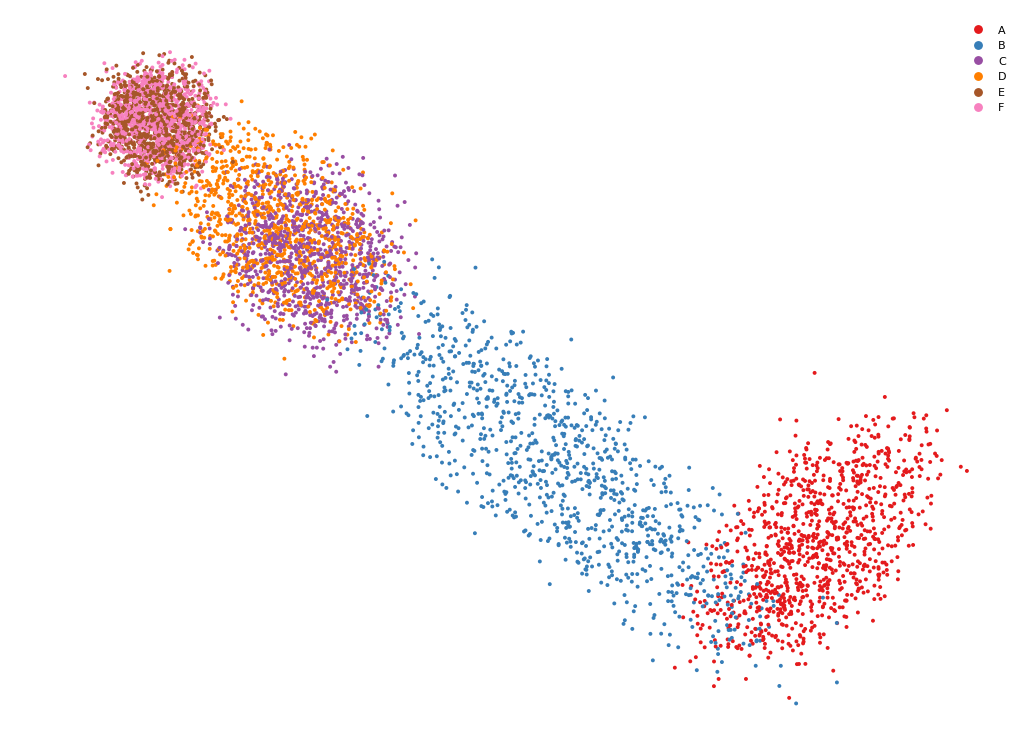

In [8]:
oci.tl.project_2d(adata, x3d_key='modality0', output_key='modality0_proj', alpha=30, beta=0)
oci.pl.scatter(adata, x_key='modality0_proj', color_key='type', marker_size=2, cmap='Set1')

Notice that only types A and B are well-defined in this modality. Types C, D, and E, F are mixed up. When looking only at ``modality0``, it is impossible to understand the structure of the underlying developmental process beyond A/B observations.

Observations are ordered according to a ``pseudotime``. The developmental process begins at the intersection of A and B types and proceeds further. 

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

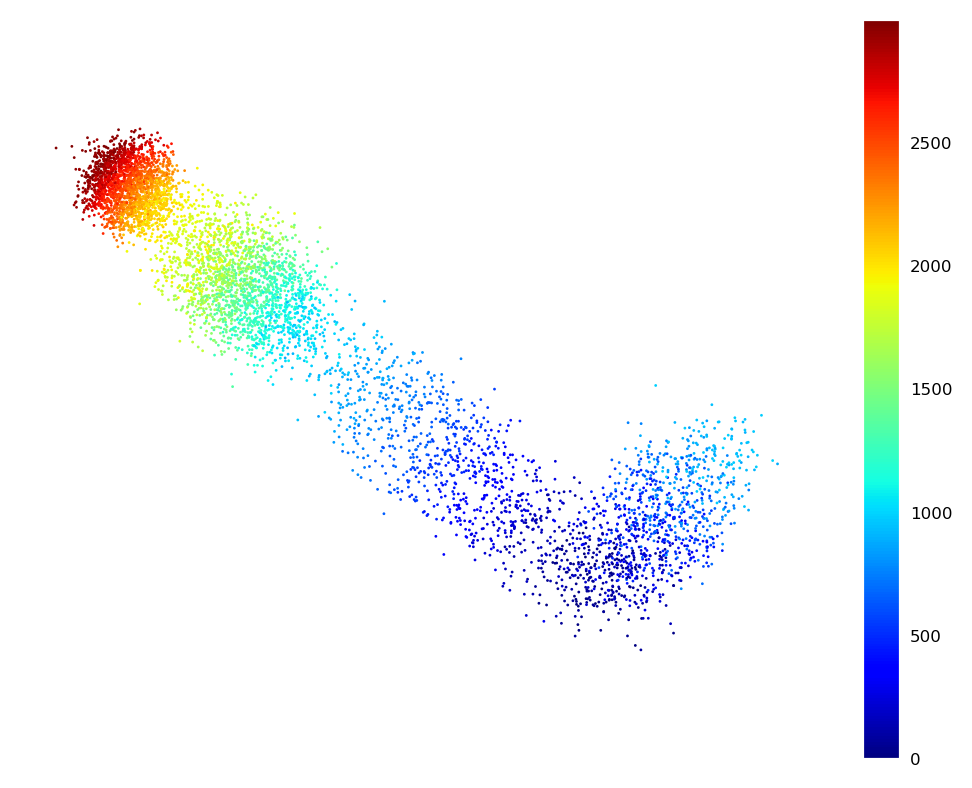

In [9]:
oci.pl.scatter(adata, x_key='modality0_proj', color_key='pseudotime', marker_size=1, cmap='jet')

The power of multimodal data lies in the fact that what is invisible in one modality may be found in another. ``modality1`` allows us to uncover lineages of types C and D.

(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

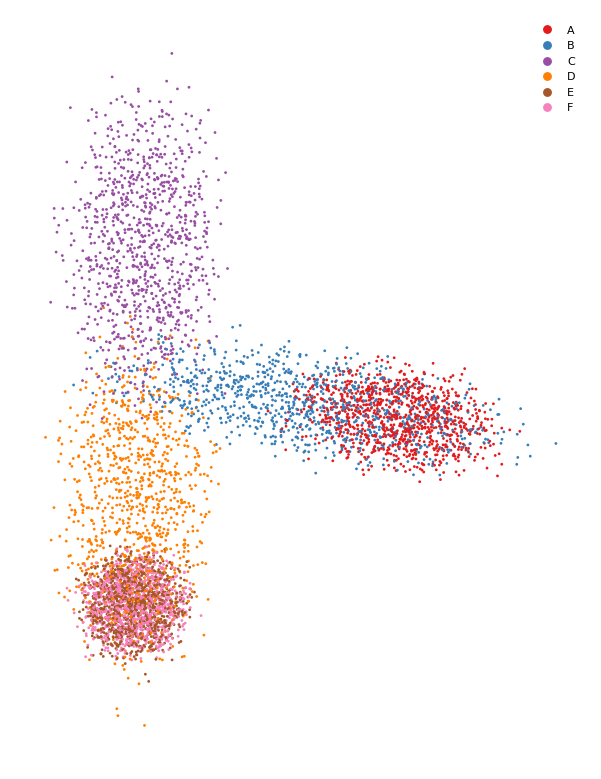

In [10]:
oci.tl.project_2d(adata, x3d_key='modality1', output_key='modality1_proj', alpha=--60, beta=60)
oci.pl.scatter(adata, x_key='modality1_proj', color_key='type', marker_size=1, cmap='Set1')

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

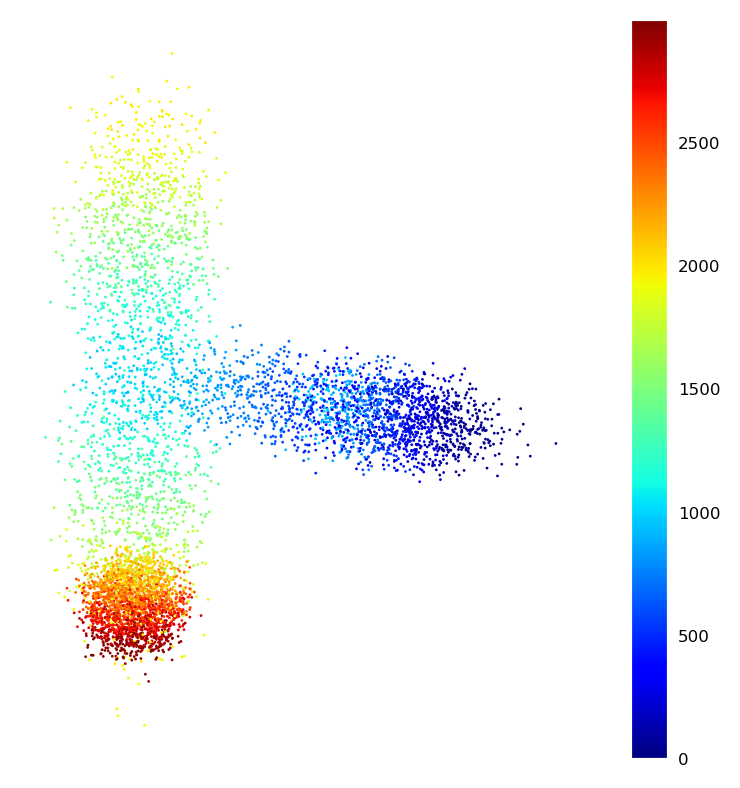

In [11]:
oci.pl.scatter(adata, x_key='modality1_proj', color_key='pseudotime', marker_size=1, cmap='jet')

Similarly, ``modality2`` reveals that observations E and F are separate lineages, which is unclear when looking at ``modality0`` or ``modality1``.

(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

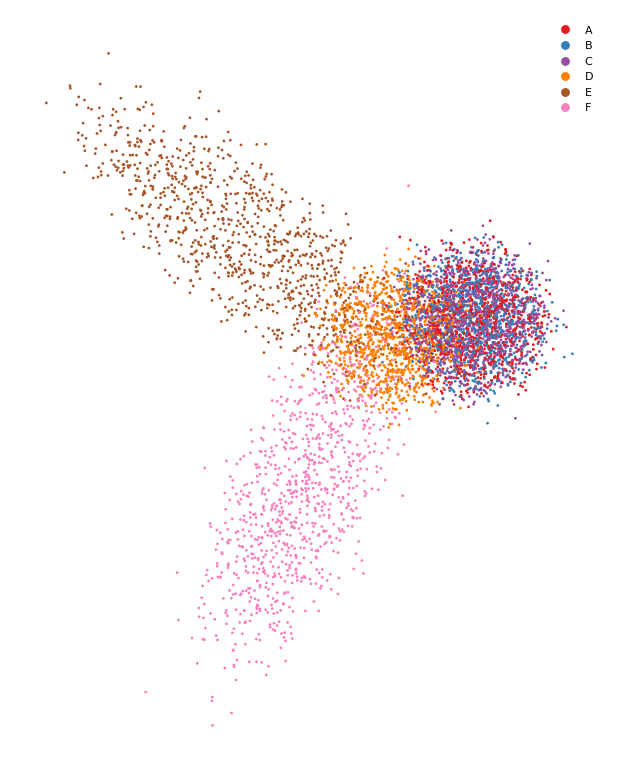

In [12]:
oci.tl.project_2d(adata, x3d_key='modality2', output_key='modality2_proj', alpha=30, beta=30)
oci.pl.scatter(adata, x_key='modality2_proj', color_key='type', marker_size=1, cmap='Set1')

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

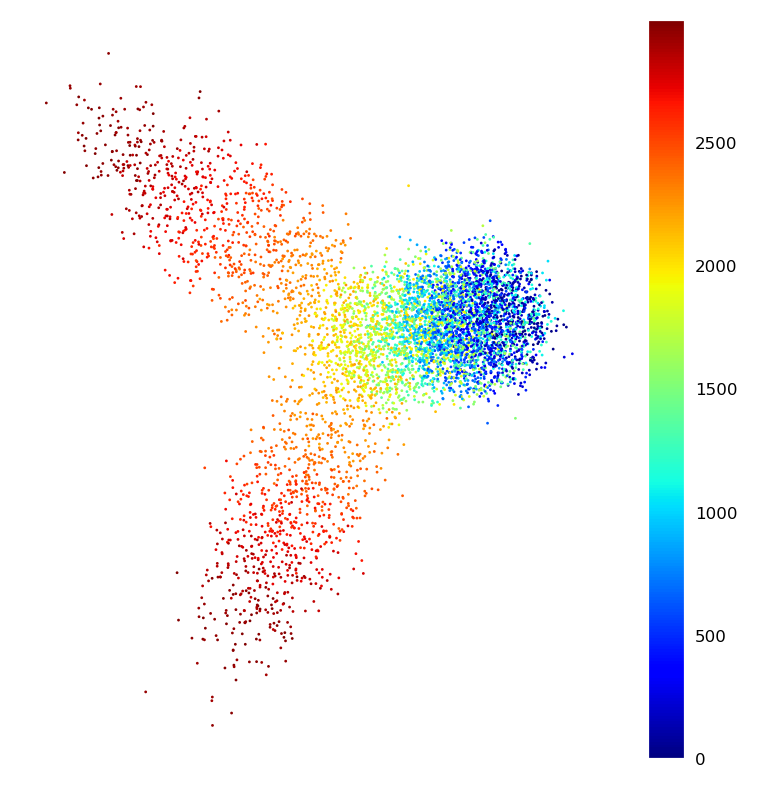

In [13]:
oci.pl.scatter(adata, x_key='modality2_proj', color_key='pseudotime', marker_size=1, cmap='jet')

## Multimodal perspective

All the above plots are unimodal - they don't capture the whole extent of available information. Ocelli provides tools for embedding multimodal data into a single, multimodal latent space using the Multimodal Diffusion Maps algorithm. This process can be split into three stages:

- Nearest neighbors search,
- Calculation of multimodal weights,
- Calculation of Multimodal Diffusion Maps embedding.

There are two significant parameters here. Larger ``n_neighbors`` makes multimodal weights more global and less local. However, for all single-cell analyses, we set its value to ``20``. Unless necessary, we recommend the same for you. ``n_components`` defines the dimensionality of the Multimodal Diffusion Maps embedding. It would be best if you explored this value for each dataset individually. MDM components are information-rich, but their quality can degrade with quantity. The philosophy is to select as few and as many components as necessary.

*Technical remark: Parameter ``unimodal_norm`` is described in API. We set its value to False only for simulated data. For single-cell data, we use its default True value. In other words, you can forget about ``unimodal_norm`` when working with single cells. ``unimodal_norm``'s value is changed here because the simulated 3D data is sampled from an artificial distribution, which is low-dimensional, dense, and non-normalized. Single-cell data come from high-dimensional latent spaces of incomparable complexity that are properly normalized during data preprocessing (details in the following tutorials).*

In [14]:
oci.pp.neighbors(adata, n_neighbors=20, verbose=True)
oci.tl.weights(adata, random_state=SEED, verbose=True)
oci.tl.MDM(adata, n_components=10, unimodal_norm=False, verbose=True, random_state=SEED)

[modality0] 20 nearest neighbors calculated.
[modality1] 20 nearest neighbors calculated.
[modality2] 20 nearest neighbors calculated.


2022-10-10 21:44:32,006	INFO worker.py:1518 -- Started a local Ray instance.


Multimodal cell-specific weights estimated.


2022-10-10 21:44:39,288	INFO worker.py:1518 -- Started a local Ray instance.


[modality0] Unimodal Markov chain calculated
[modality1] Unimodal Markov chain calculated
[modality2] Unimodal Markov chain calculated
Multimodal Markov chain calculated
Eigendecomposition finished.
10 Multimodal Diffusion Maps components calculated.


The resulting 10-dimensional embedding represents a multimodal latent space from which the modeled developmental process originates. The embedding is saved to ``adata.obsm`` as ``X_mdm``. Below, we visualize it using ForceAtlas2, a force-directed layout algorithm for graph visualization, in three steps:
- Nearest neighbors search in the MDM latent space,
- Calculation of nearest neighbor graph,
- Graph visualization.

[X_mdm] 30 nearest neighbors calculated.
[X_mdm] Nearest neighbors-based graph constructed.


Oct 10, 2022 9:44:56 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Oct 10, 2022 9:44:57 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 6,000 (6,000 added)
Oct 10, 2022 9:44:57 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 180,000 (108,678 added)


*************************25%
*************************50%
*************************75%
**

***********************100%
Time = 37.792s


(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

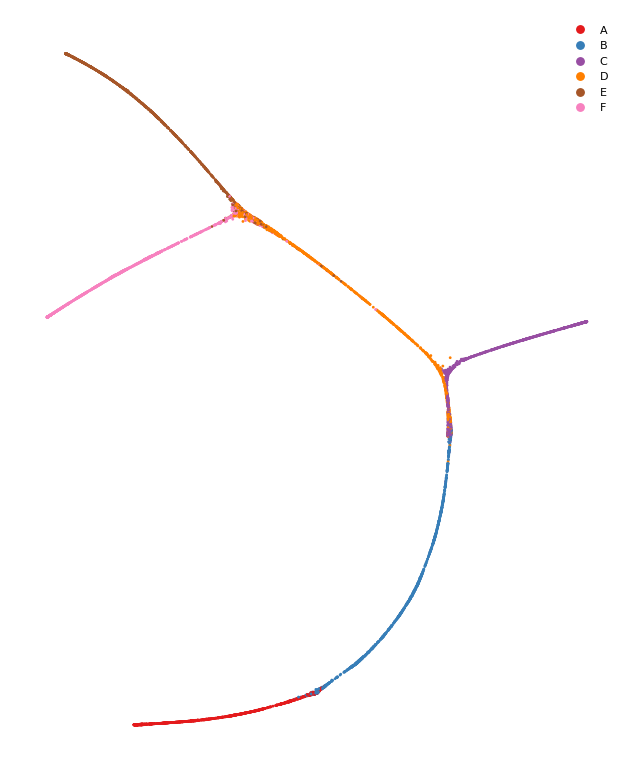

In [15]:
oci.pp.neighbors(adata, modalities=['X_mdm'], n_neighbors=30, verbose=True)
oci.tl.neighbors_graph(adata, n_edges=30, neighbors_key='X_mdm', verbose=True)
oci.tl.FA2(adata, n_components=2, n_iter=5000, random_state=SEED, output_key='X_fa2')

oci.pl.scatter(adata, x_key='X_fa2', color_key='type', cmap='Set1', marker_size=1)

Thanks to Multimodal Diffusion Maps, all observation types A-F are distinguished. It is easy to trace all developmental lineages, which were impossible to spot together in unimodal exploration.

Alternatively, you can use UMAP or any other dimension reduction algorithm to visualize MDM embedding. Ocelli has built-in wrappers for ForceAtlas2 and UMAP. For well-connected data, we recommend ForceAtlas2, and for data with separate clusters, UMAP.

(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

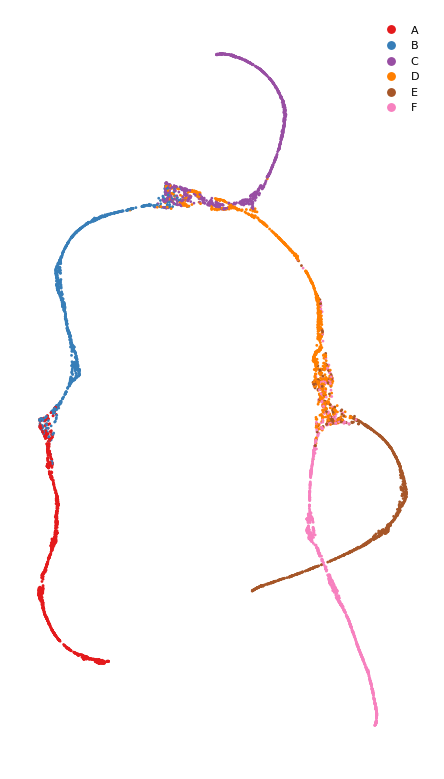

In [16]:
oci.tl.UMAP(adata, n_components=2, n_neighbors=50, random_state=SEED, obsm_key='X_mdm', output_key='X_umap')

oci.pl.scatter(adata, x_key='X_umap', color_key='type', cmap='Set1', marker_size=1)

Calculated multimodal weights provide an explainable insight into the algorithm's learning. For each cell, weights form a distribution over modalities (each observation's weights sum to 1). A higher weight indicates that the algorithm thinks a modality is more *informative* about observation and its neighborhood than others.

You can examine weight distributions with respect to each observation type.

(<Figure size 1280x960 with 18 Axes>,
 array([[<AxesSubplot:title={'center':'A'}, ylabel='modality0'>,
         <AxesSubplot:title={'center':'B'}>,
         <AxesSubplot:title={'center':'C'}>,
         <AxesSubplot:title={'center':'D'}>,
         <AxesSubplot:title={'center':'E'}>,
         <AxesSubplot:title={'center':'F'}>],
        [<AxesSubplot:ylabel='modality1'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='modality2'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

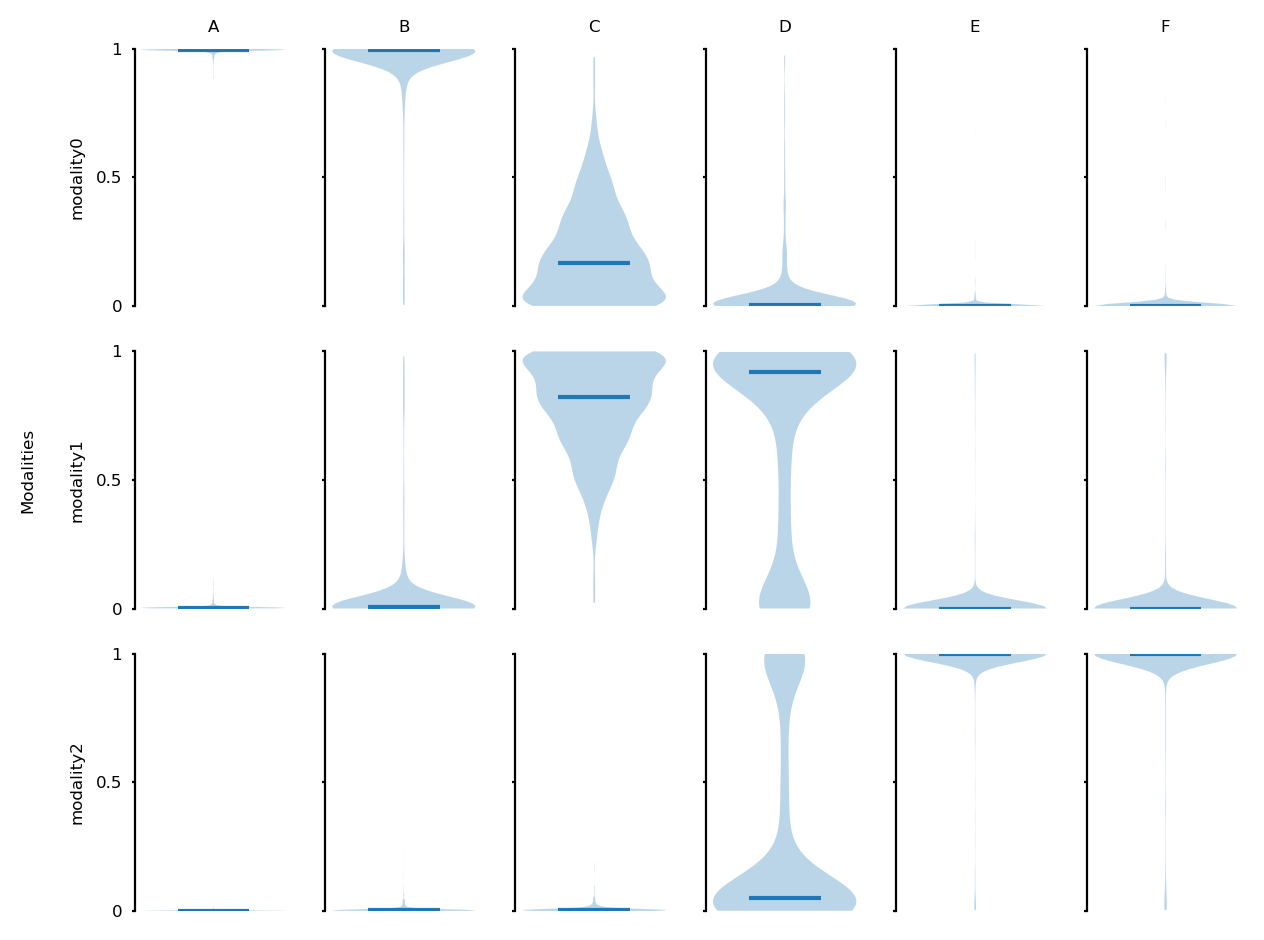

In [17]:
oci.pl.weights(adata, grouping_key='type')

``modality0``'s weights are dominant for types A and B. ``modality1``'s weights are dominant for types C and D. ``modality2``'s weights are dominant for types E and F. You can further visualize multimodal weights on scatter plots.

``modality0``'s weights:

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

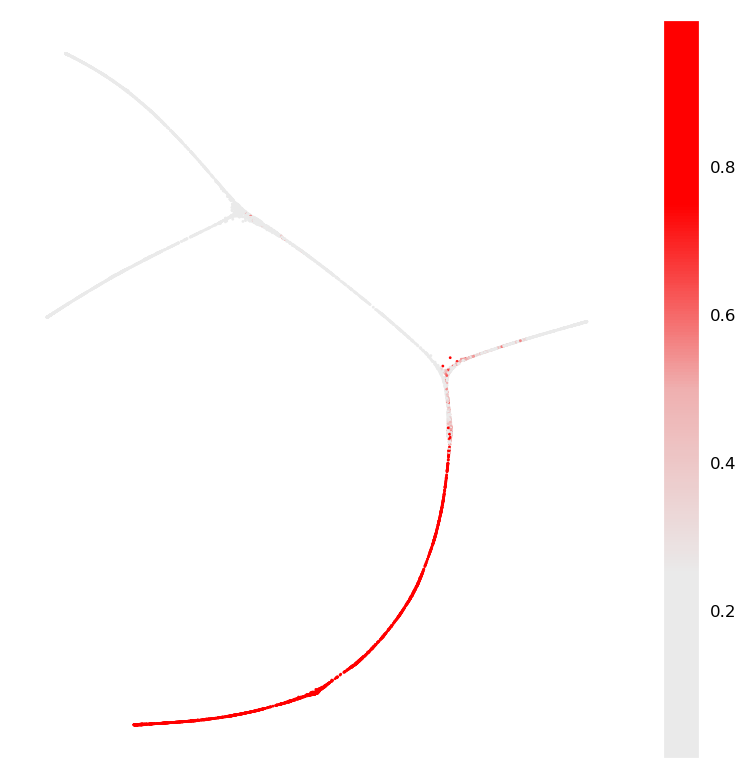

In [18]:
weights_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['#EAEAEA', '#EAEAEA', '#EFB0B0', '#FF0000', '#FF0000'], N=256)

adata.obs['w_m0'] = list(adata.obsm['weights']['modality0'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m0', cmap=weights_cmap, marker_size=1)

``modality1``'s weights:

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

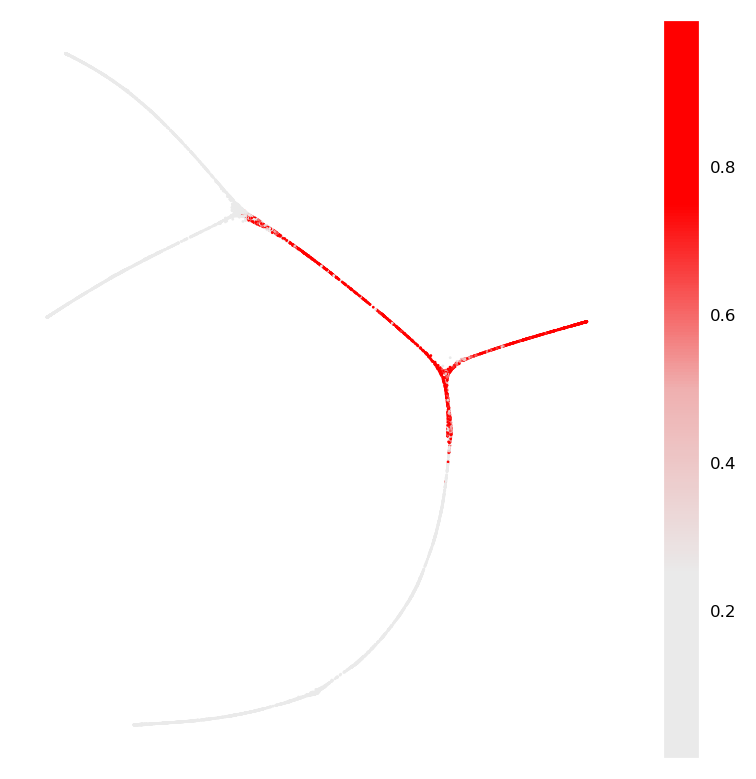

In [19]:
adata.obs['w_m1'] = list(adata.obsm['weights']['modality1'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m1', cmap=weights_cmap, marker_size=1)

``modality2``'s weights:

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

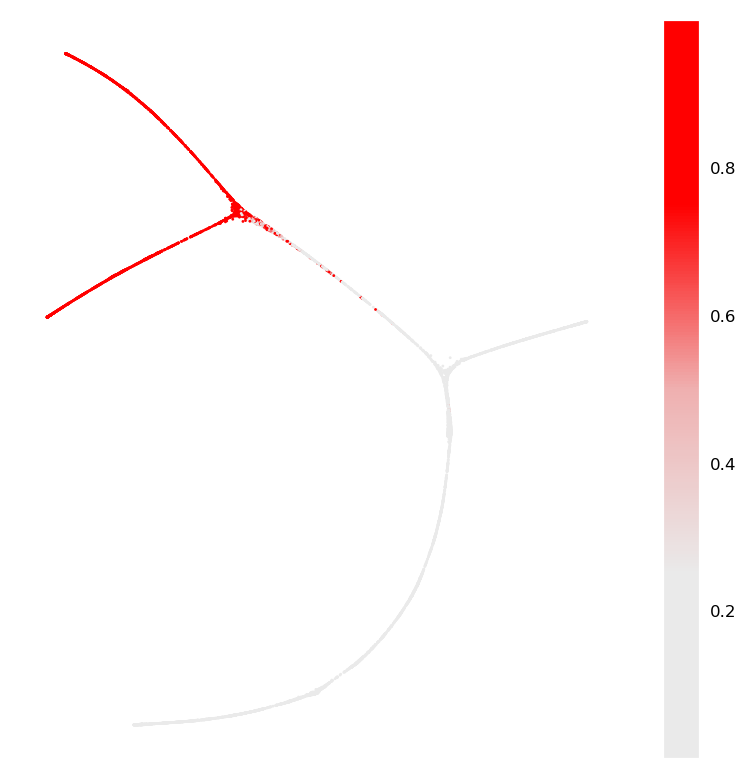

In [20]:
adata.obs['w_m2'] = list(adata.obsm['weights']['modality2'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m2', cmap=weights_cmap, marker_size=1)

It is interesting to see what happens when you limit the available information only to two out of three modalities, e.g., only ``modality0`` and ``modality1``.

2022-10-10 21:46:22,757	INFO worker.py:1518 -- Started a local Ray instance.


Multimodal cell-specific weights estimated.


2022-10-10 21:46:29,773	INFO worker.py:1518 -- Started a local Ray instance.


[modality0] Unimodal Markov chain calculated
[modality1] Unimodal Markov chain calculated
Multimodal Markov chain calculated
Eigendecomposition finished.
10 Multimodal Diffusion Maps components calculated.
[X_mdm] 30 nearest neighbors calculated.
[X_mdm] Nearest neighbors-based graph constructed.


Oct 10, 2022 9:46:47 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Oct 10, 2022 9:46:48 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 6,000 (6,000 added)
Oct 10, 2022 9:46:48 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 180,000 (107,431 added)


*************************25%
*************************50%
*************************75%
***

**********************100%
Time = 36.503s


(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

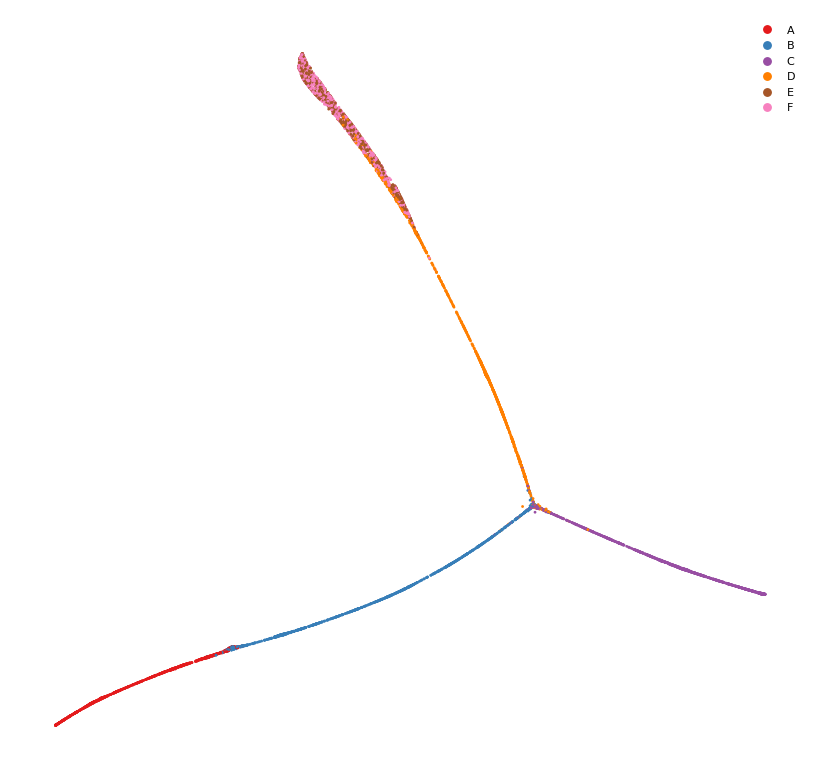

In [21]:
adata.uns['modalities'] = ['modality0', 'modality1']

oci.tl.weights(adata, random_state=SEED, verbose=True)
oci.tl.MDM(adata, n_components=10, unimodal_norm=False, verbose=True, random_state=SEED)

oci.pp.neighbors(adata, modalities=['X_mdm'], n_neighbors=30, verbose=True)
oci.tl.neighbors_graph(adata, n_edges=30, neighbors_key='X_mdm', verbose=True)
oci.tl.FA2(adata, n_components=2, n_iter=5000, random_state=SEED, output_key='X_fa2')

oci.pl.scatter(adata, x_key='X_fa2', color_key='type', cmap='Set1', marker_size=1)

As expected, observations E and F from unused ``modality2`` are mixed, while all other types are well-reconstructed.

Multimodal weights distributions show why this is the case.

(<Figure size 1280x960 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'A'}, ylabel='modality0'>,
         <AxesSubplot:title={'center':'B'}>,
         <AxesSubplot:title={'center':'C'}>,
         <AxesSubplot:title={'center':'D'}>,
         <AxesSubplot:title={'center':'E'}>,
         <AxesSubplot:title={'center':'F'}>],
        [<AxesSubplot:ylabel='modality1'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

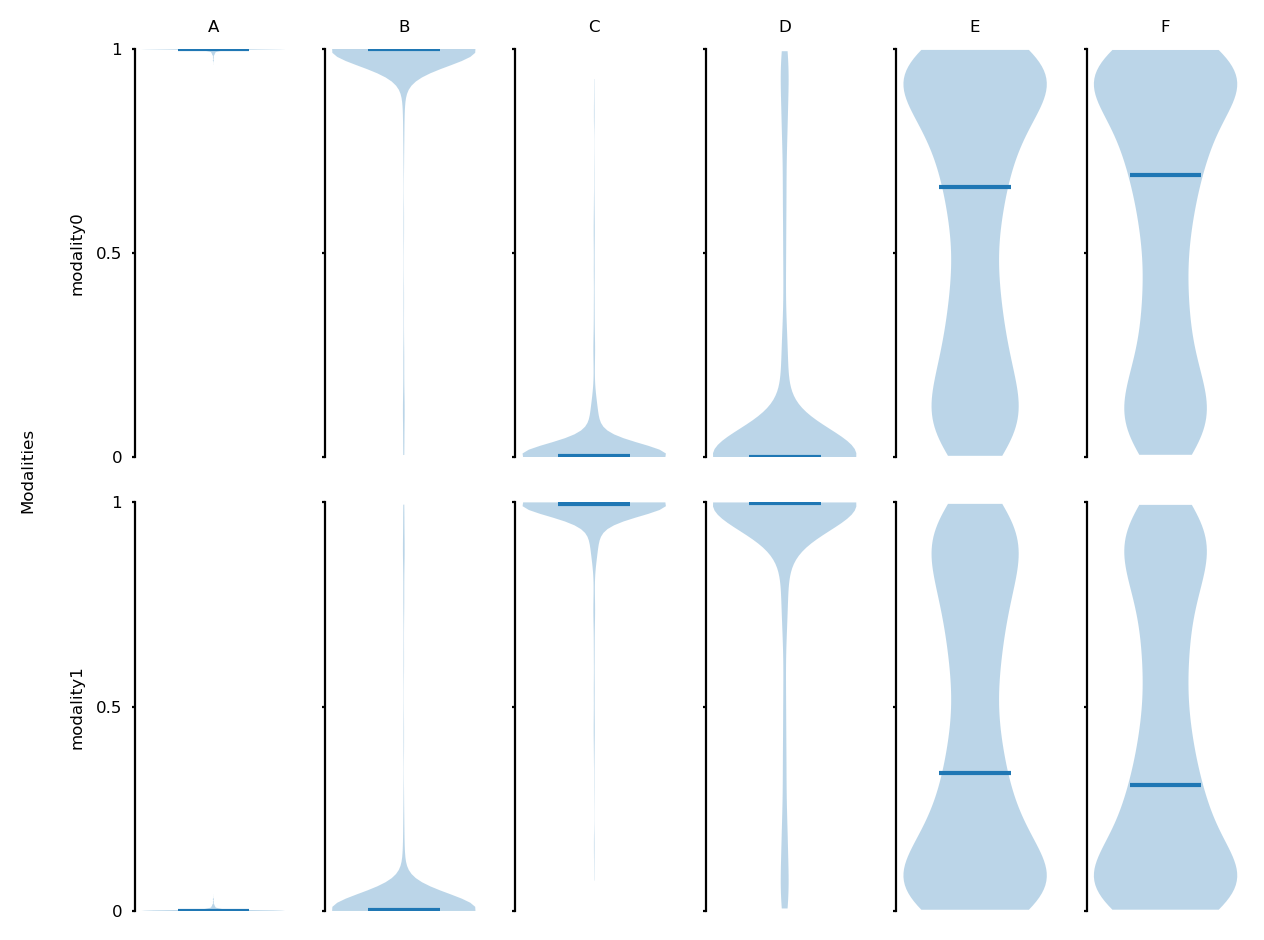

In [22]:
oci.pl.weights(adata, grouping_key='type')

``modality0``'s weights:

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

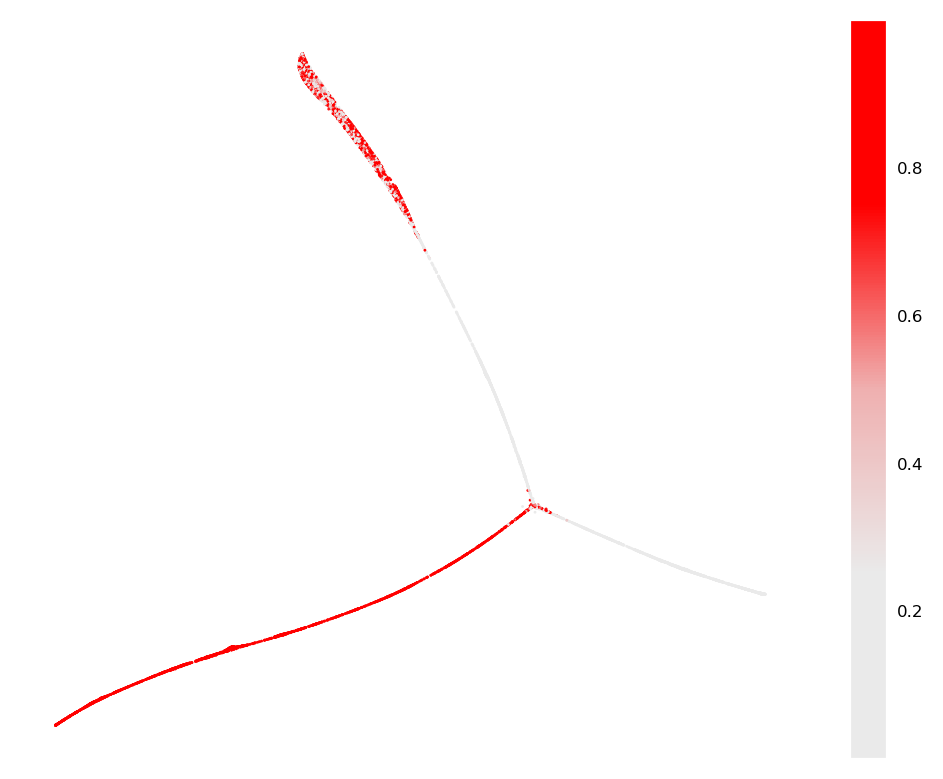

In [23]:
adata.obs['w_m0'] = list(adata.obsm['weights']['modality0'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m0', cmap=weights_cmap, marker_size=1)

``modality1``'s weights:

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

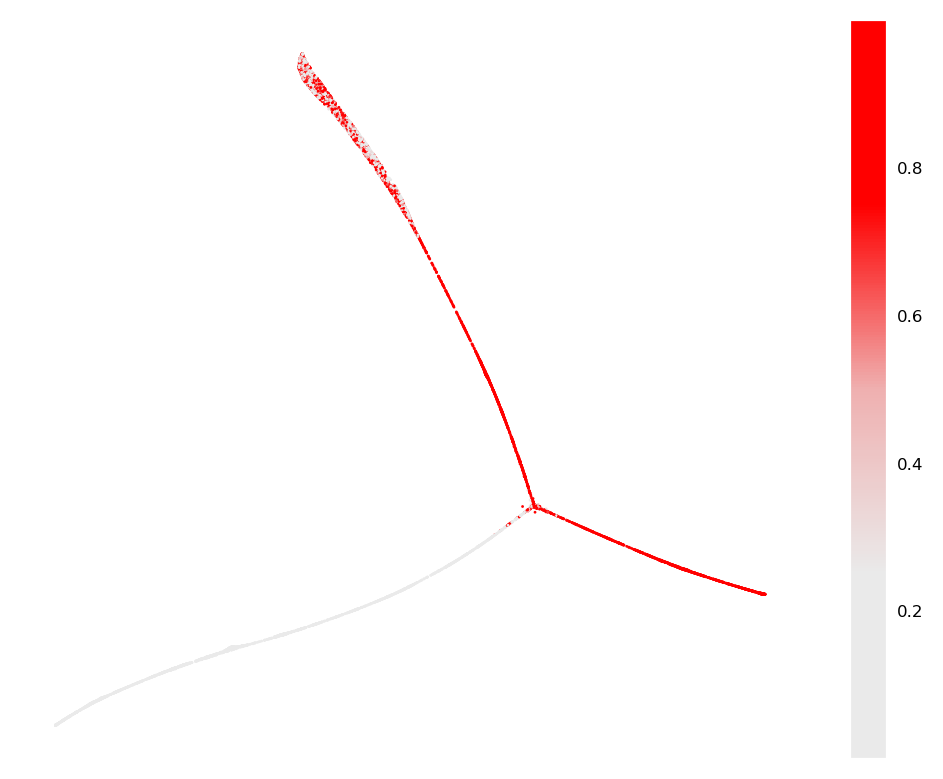

In [24]:
adata.obs['w_m1'] = list(adata.obsm['weights']['modality1'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m1', cmap=weights_cmap, marker_size=1)

## Another example

Similarly, we can now explore another simulated dataset. This time we will work on two 3D modalities ``modality0`` and ``modality1`` with 4500 observations each.

In [25]:
adata = anndata.read_h5ad('../../../data/sparse-transitions-dataset.h5ad')
adata

AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'type', 'pseudotime'
    uns: 'modalities'
    obsm: 'modality0', 'modality1'

Observations are labeled into nine types and are ordered according to a pseudotime visualized below.

(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

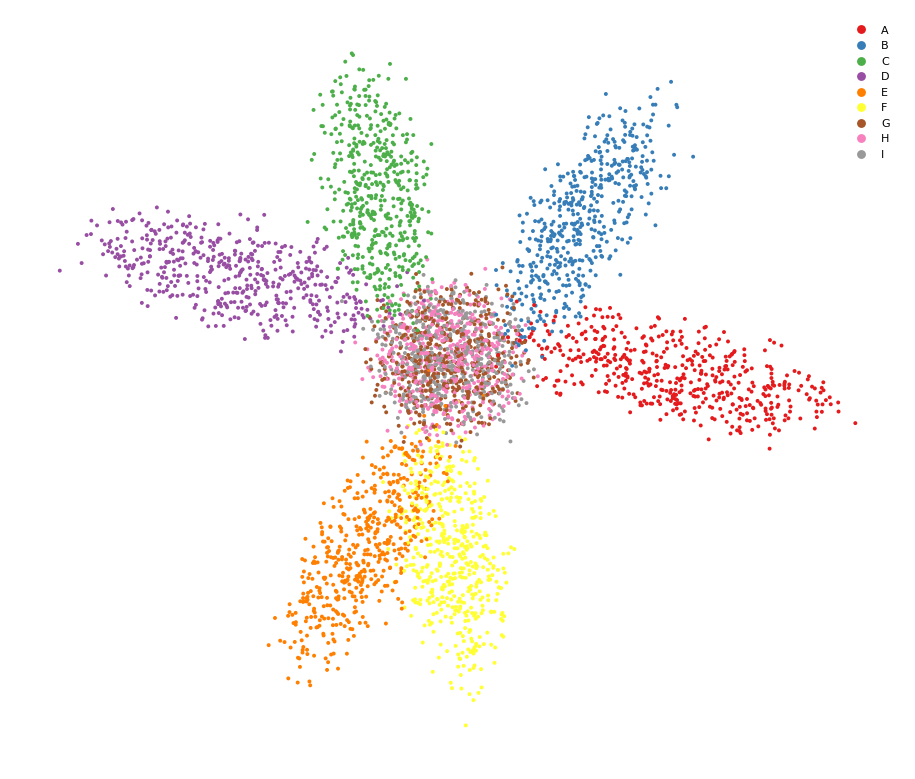

In [26]:
oci.tl.project_2d(adata, x3d_key='modality0', output_key='modality0_proj', alpha=-45, beta=120)
oci.pl.scatter(adata, x_key='modality0_proj', color_key='type', marker_size=2, cmap='Set1')

``modality0`` shows clear developmental lineages for types A-F, however, types G-I are undistinguishable.

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

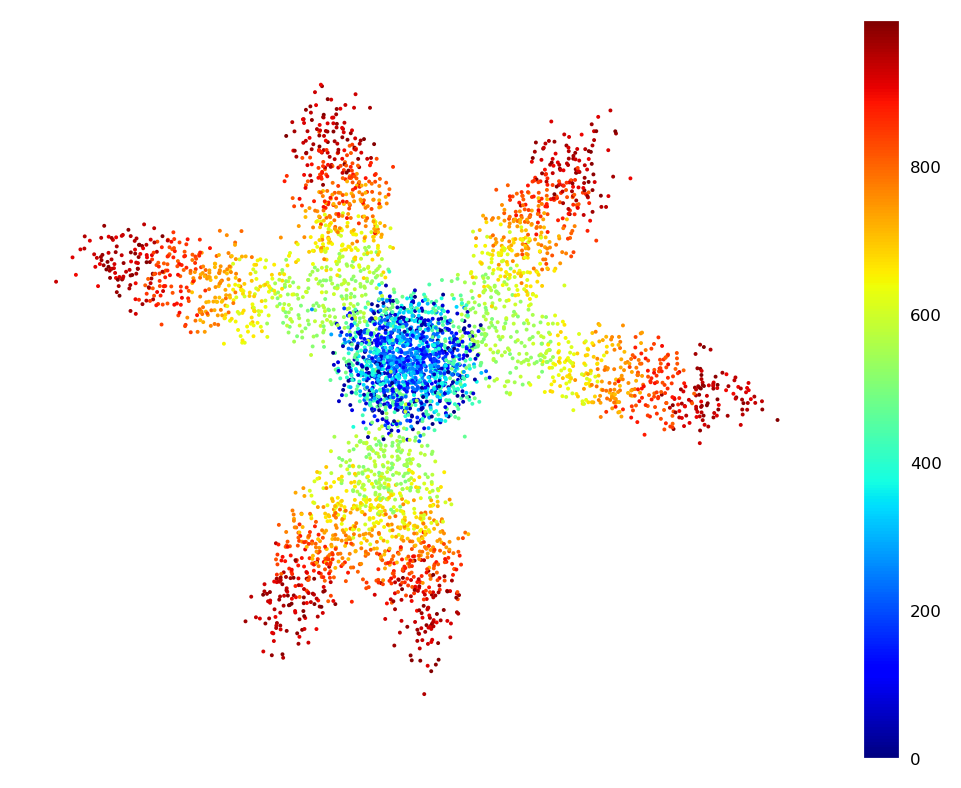

In [27]:
oci.pl.scatter(adata, x_key='modality0_proj', color_key='pseudotime', marker_size=2, cmap='jet')

``modality2`` exposes types G-I as sparse transitions.

(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

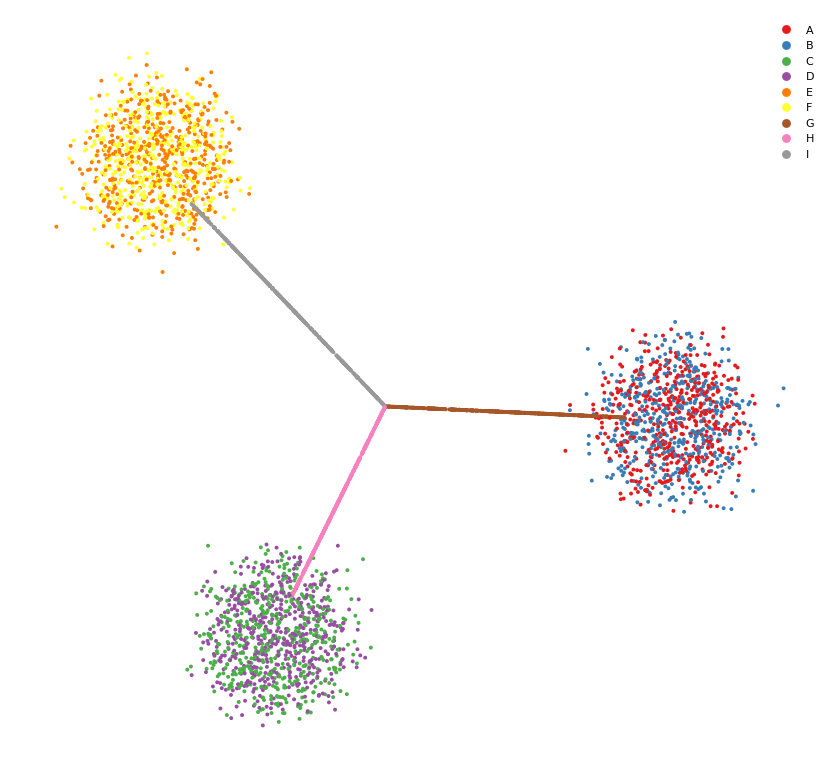

In [28]:
oci.tl.project_2d(adata, x3d_key='modality1', output_key='modality1_proj', alpha=-45, beta=60)
oci.pl.scatter(adata, x_key='modality1_proj', color_key='type', marker_size=2, cmap='Set1')

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

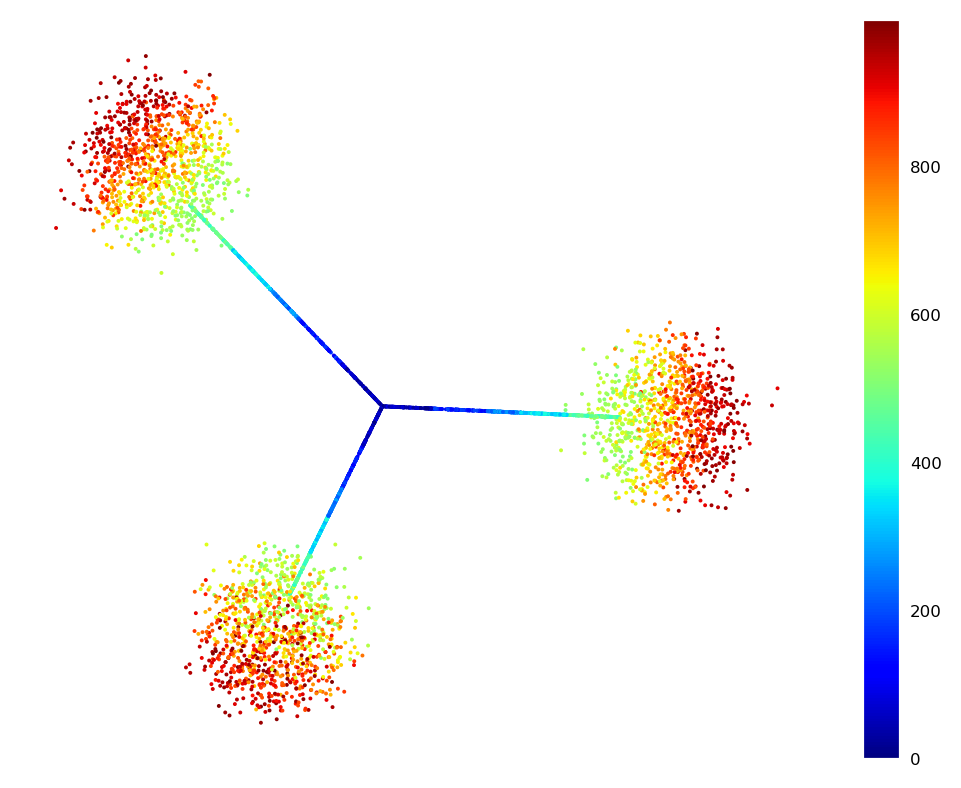

In [29]:
oci.pl.scatter(adata, x_key='modality1_proj', color_key='pseudotime', marker_size=2, cmap='jet')

Now repeat the process - calculate nearest neighborss, multimodal weights and the Multimodal Diffusion Maps embedding.

In [30]:
oci.pp.neighbors(adata, n_neighbors=60, verbose=True)
oci.tl.weights(adata, random_state=SEED, verbose=True)
oci.tl.MDM(adata, n_components=20, unimodal_norm=False, verbose=True, random_state=SEED)

[modality0] 60 nearest neighbors calculated.
[modality1] 60 nearest neighbors calculated.


2022-10-10 21:47:29,891	INFO worker.py:1518 -- Started a local Ray instance.


Multimodal cell-specific weights estimated.


2022-10-10 21:47:37,009	INFO worker.py:1518 -- Started a local Ray instance.


[modality0] Unimodal Markov chain calculated
[modality1] Unimodal Markov chain calculated
Multimodal Markov chain calculated
Eigendecomposition finished.
20 Multimodal Diffusion Maps components calculated.


Produce a ForceAtlas2 visualization based on a nearest neighbors graph.

In [31]:
oci.pp.neighbors(adata, modalities=['X_mdm'], n_neighbors=60, verbose=True)
oci.tl.neighbors_graph(adata, n_edges=60, neighbors_key='X_mdm', verbose=True)
oci.tl.FA2(adata, n_components=2, n_iter=5000, random_state=SEED, output_key='X_fa2')

[X_mdm] 60 nearest neighbors calculated.
[X_mdm] Nearest neighbors-based graph constructed.


Oct 10, 2022 9:47:56 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Oct 10, 2022 9:47:58 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 4,500 (4,500 added)
Oct 10, 2022 9:47:58 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 270,000 (152,395 added)


*************************25%
*************************50%
*************************75%
********

*****************100%
Time = 35.026s


(<Figure size 1280x960 with 1 Axes>, <AxesSubplot:>)

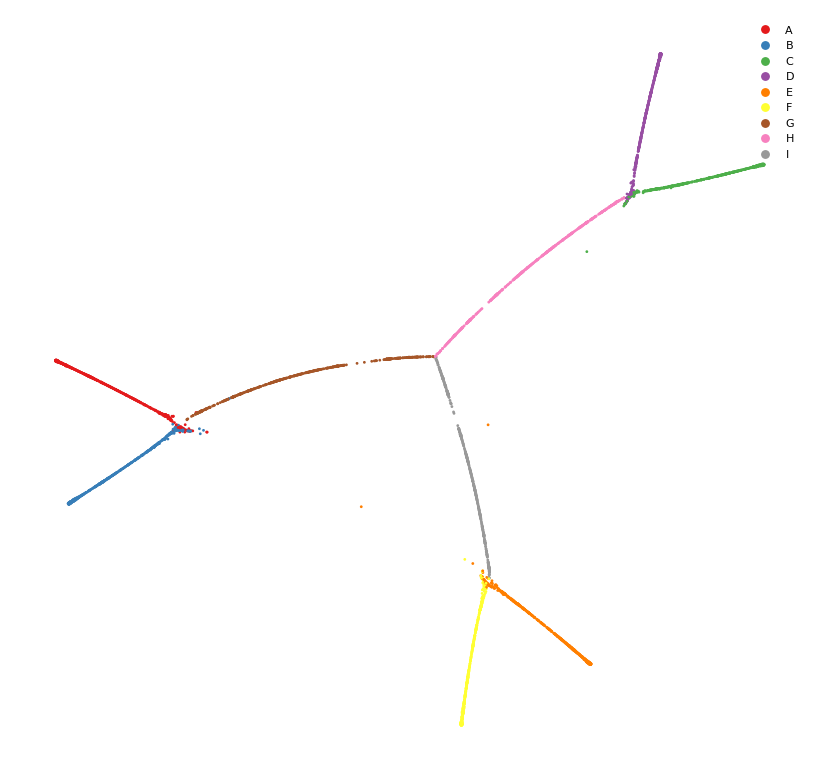

In [32]:
oci.pl.scatter(adata, x_key='X_fa2', color_key='type', cmap='Set1', marker_size=1)

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

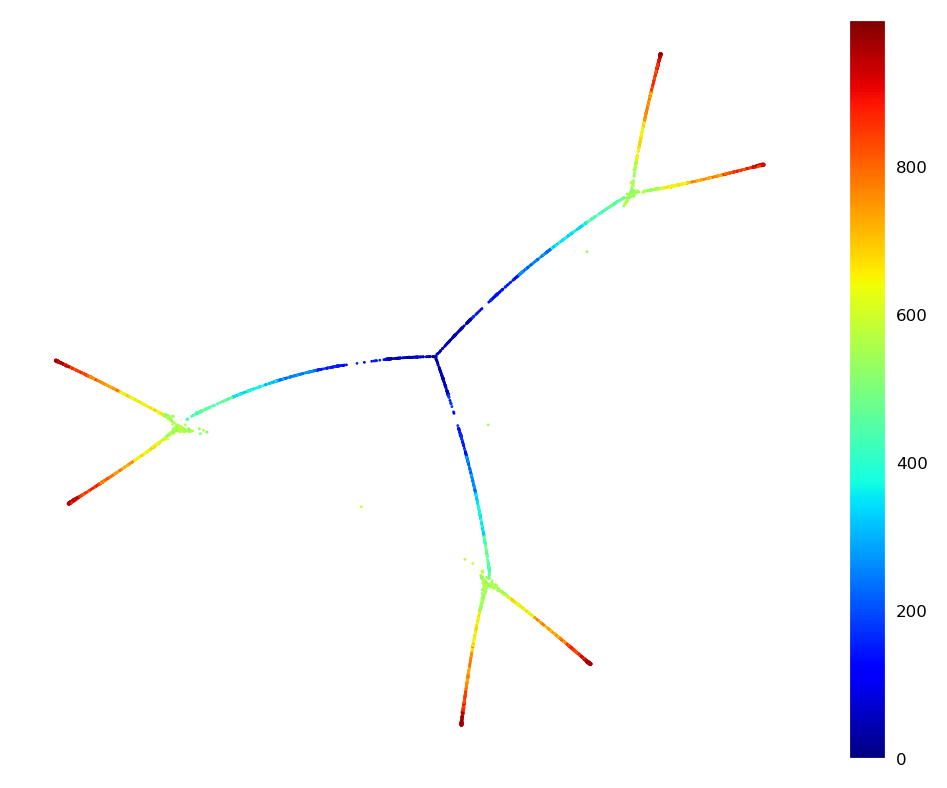

In [33]:
oci.pl.scatter(adata, x_key='X_fa2', color_key='pseudotime', cmap='jet', marker_size=1)

You can further peak at multimodal weights distributions to confirm that the model performs as it should.

(<Figure size 1280x960 with 18 Axes>,
 array([[<AxesSubplot:title={'center':'A'}, ylabel='modality0'>,
         <AxesSubplot:title={'center':'B'}>,
         <AxesSubplot:title={'center':'C'}>,
         <AxesSubplot:title={'center':'D'}>,
         <AxesSubplot:title={'center':'E'}>,
         <AxesSubplot:title={'center':'F'}>,
         <AxesSubplot:title={'center':'G'}>,
         <AxesSubplot:title={'center':'H'}>,
         <AxesSubplot:title={'center':'I'}>],
        [<AxesSubplot:ylabel='modality1'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

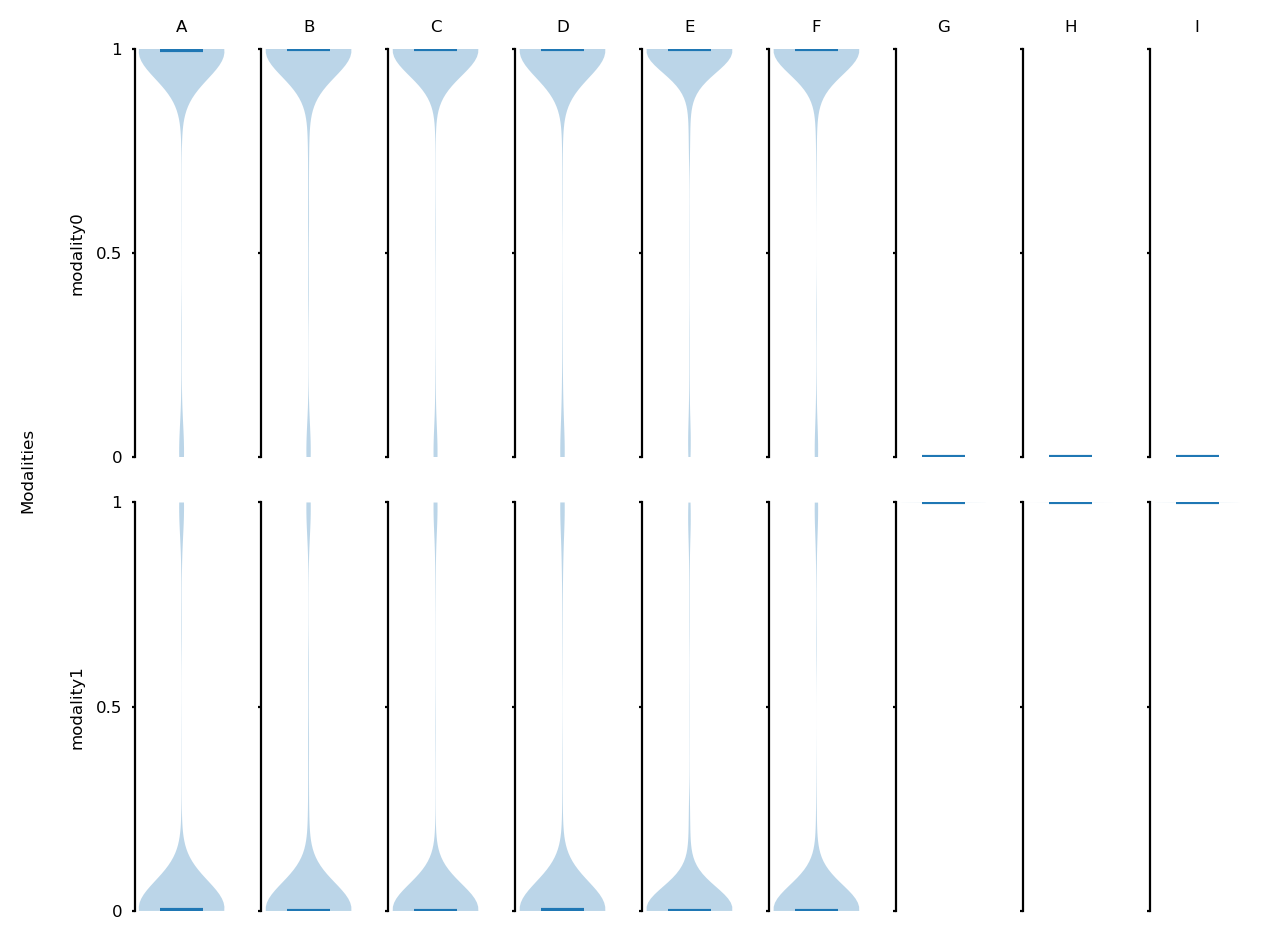

In [34]:
oci.pl.weights(adata, grouping_key='type')

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

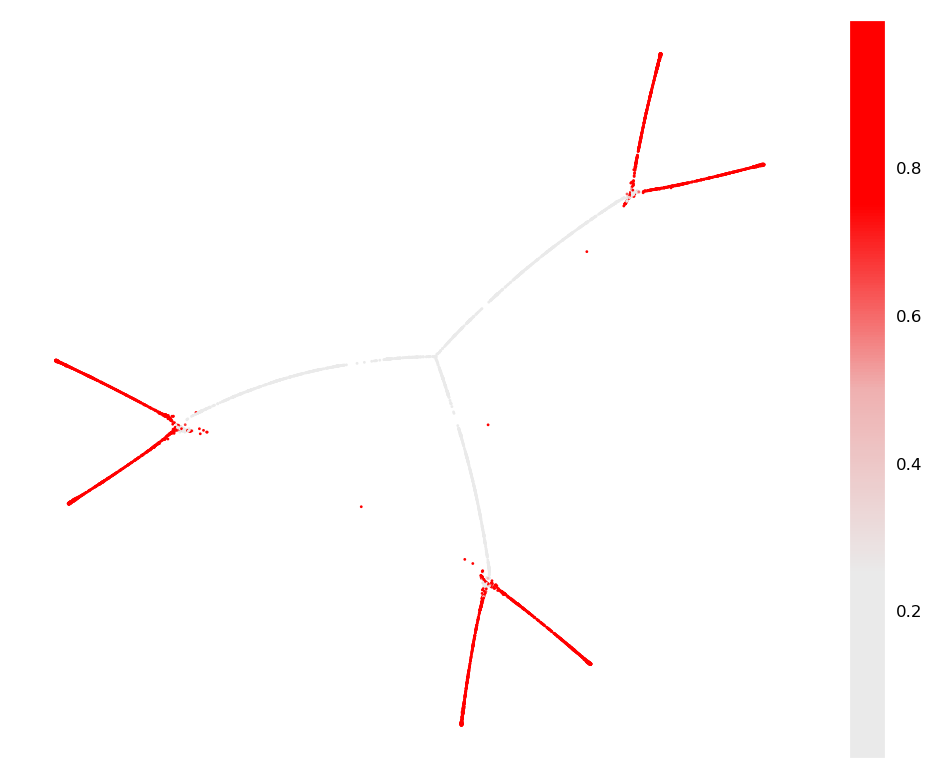

In [35]:
adata.obs['w_m0'] = list(adata.obsm['weights']['modality0'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m0', cmap=weights_cmap, marker_size=1)

(<Figure size 1280x960 with 2 Axes>, <AxesSubplot:>)

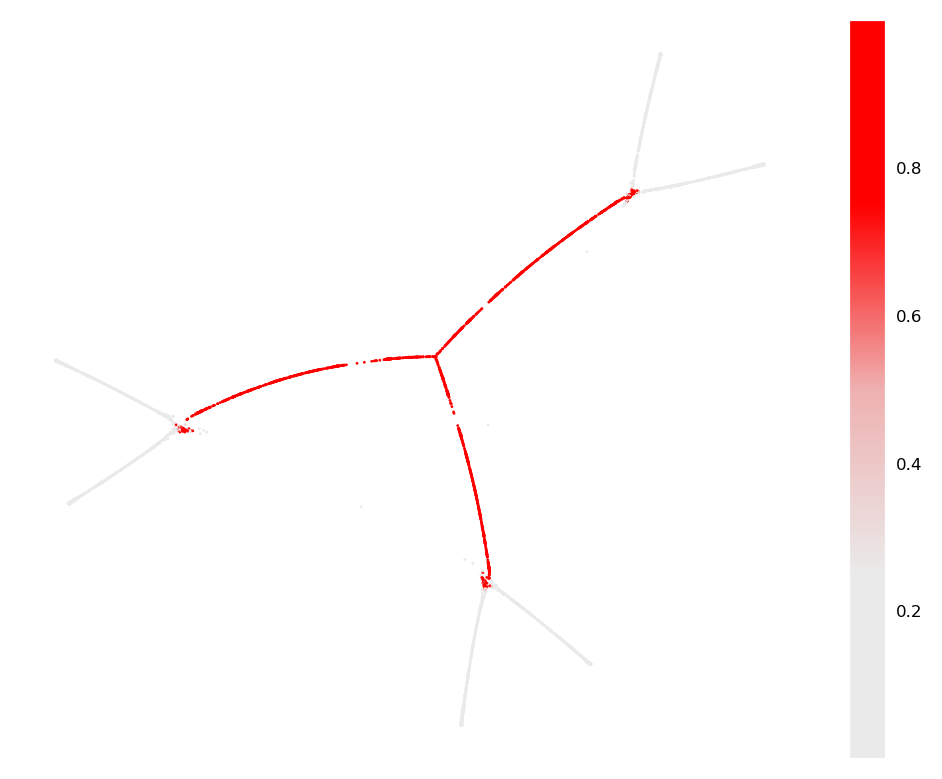

In [36]:
adata.obs['w_m1'] = list(adata.obsm['weights']['modality1'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m1', cmap=weights_cmap, marker_size=1)

It is a wrap-up of the first tutorial! Now you should better understand why multimodal visualizations unlock a new comprehension of data and how to build a basic Ocelli workflow.

In the following tutorials, we will focus on single-cell data analysis!